In [110]:
import numpy as np
import matplotlib.pyplot as plt
import random

In [111]:
def step(u):
  if (u >= 0):
    return (1.0)
  else:
    return (0.0)

def getNextWeightsVector(previousWeightsVector, error, inputAttributesVector):
  # Delta Rule
  learningRate = 0.1
  return (previousWeightsVector + learningRate * error * inputAttributesVector)

def getWeightedSum(inputAttributesVector, weightsVector):
  multiplicationOfVectors = inputAttributesVector * weightsVector
  return (multiplicationOfVectors.sum())

def getError(realOutput, outputDeducted):
  return (realOutput - outputDeducted)

def checkArrayEquality(array1, array2):
  return (np.array_equal(array1, array2))

def getWeightsVector():
  weightsVector = np.array([])
  for i in range(3):
    randomNumber = random.uniform(-0.5, 0.5)
    weightsVector = np.append(weightsVector, randomNumber)
  return (weightsVector)

def getOutputVector(data):
  outputVector = np.array([])
  for e in data:
    outputVector = np.append(outputVector, e[2])
  return outputVector

def addBiasToInputVector(inputVector):
  return np.insert(inputVector, 0, -1.0)

def getInputVectorGroup(data):
  inputVectorGroup = np.array([])
  for e in data:
    inputVector = e[:2]
    inputVectorWithBias = addBiasToInputVector(inputVector)
    inputVectorGroup = np.append(inputVectorGroup, inputVectorWithBias)
  return inputVectorGroup.reshape((1000, 3))

def teachPerceptron(data):
  deducedOutputVector = np.array([])
  outputVector = getOutputVector(data)
  weightsVector = getWeightsVector()
  inputVectorGroup = getInputVectorGroup(data)

  numberOfFitsInTheWeightVector = 0
  epoch = 0

  print("vetor de pesos: ", weightsVector)

  while (not checkArrayEquality(deducedOutputVector, outputVector)):
    epoch += 1
    for i in range(len(inputVectorGroup)):
      inputVector = inputVectorGroup[i]
      realOutput = outputVector[i]

      weightedSum = getWeightedSum(inputVector, weightsVector)
      outputDeducted = step(weightedSum)
      
      if (len(deducedOutputVector) == 1000):
        deducedOutputVector[i] = outputDeducted
      else:
        deducedOutputVector = np.insert(deducedOutputVector, i, outputDeducted)

      error = getError(realOutput, outputDeducted)

      if (error):
        weightsVector = getNextWeightsVector(weightsVector, error, inputVector)
        numberOfFitsInTheWeightVector += 1
      
  
  print("O número total de ajustes no vetor de pesos: ", numberOfFitsInTheWeightVector)
  print("número de épocas até a convergência: ", epoch)
  print("vetor de pesos final: ", weightsVector)
  
  vetor = getInputVectorGroup(data)
  vetor = np.delete(vetor, 0, 1)

  # Plot the vector
  plt.scatter(vetor[:,0],vetor[:,1], s=10)
  
  x = np.arange(min(vetor[:,:1]),max(vetor[:,:1]), 0.1)
  y = weightsVector[0]/weightsVector[2] - (weightsVector[1]/weightsVector[2] * x)
  plt.plot(x, 
           y, 
           color="black", 
           linewidth=4)

  # Add labels and title
  plt.xlabel('x-axis')
  plt.ylabel('y-axis')
  plt.title('Vector Plot')

  # Show the plot
  plt.show()

vetor de pesos:  [0.2802534  0.49015027 0.38236346]
O número total de ajustes no vetor de pesos:  222
número de épocas até a convergência:  21
vetor de pesos final:  [  -3.3197466   635.10790027 -633.30168654]


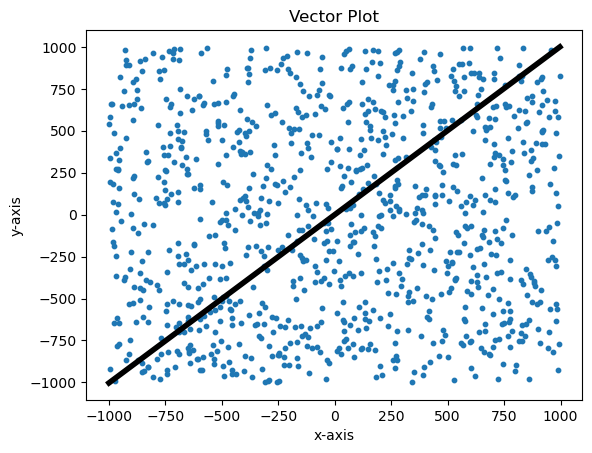

In [109]:
data = np.fromfile("data/dataAll.txt").reshape((1000, 3))

teachPerceptron(data)